<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Braisleirao_Meias_Ofensivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[01/05/25 16:20:19] INFO     No custom team name replacements found. You can configure these in       ]8;id=565751;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=477080;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=373366;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=375876;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[01/05/25 16:20:21] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=46523;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=274646;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                   Playing Time               \
                                                             MP Starts   Min   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio           20     14  1215   
                                  Alex Santana                4      0   101   
                                  Bento                       7      7   630   
                                  Bruno Praxedes              7      2   237   
                                  Bruno Zapelli              32     16  1412   

                                                         Performance      ...  \
                                                     90s         Gls Ast  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           4   1  ...   
                                  Alex Santana       1.1           0   0  ...   
                                  Bento              7.0           0   0  ...   
                                  Bruno Praxedes     2.6           0   0  ...   
                                  Bruno Zapelli     15.7           0   5  ...   

                                                   Per 90 Minutes              \
                                                              Gls   Ast   G+A   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            0.3  0.07  0.37   
                                  Alex Santana                0.0   0.0   0.0   
                                  Bento                       0.0   0.0   0.0   
                                  Bruno Praxedes              0.0   0.0   0.0   
                                  Bruno Zapelli               0.0  0.32  0.32   

                                                                            \
                                                   G-PK G+A-PK    xG   xAG   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.3   0.37  0.26  0.18   
                                  Alex Santana      0.0    0.0  0.06   0.0   
                                  Bento             0.0    0.0   0.0   0.0   
                                  Bruno Praxedes    0.0    0.0  0.03  0.12   
                                  Bruno Zapelli     0.0   0.32  0.24   0.3   

                                                                          
                                                   xG+xAG  npxG npxG+xAG  
league      season team           player                                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   0.44  0.26     0.44  
                                  Alex Santana       0.06  0.06     0.06  
                                  Bento               0.0   0.0      0.0  
                                  Bruno Praxedes     0.15  0.03     0.15  
                                  Bruno Zapelli      0.54  0.24     0.54  

[5 rows x 33 columns]

In [6]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born Playing Time         ... Per 90 Minutes                                \
                  MP Starts  ...            Gls   Ast   G+A G-PK G+A-PK    xG   
0  1998           20     14  ...            0.3  0.07  0.37  0.3   0.37  0.26   
1  1995            4      0  ...            0.0   0.0   0.0  0.0    0.0  0.06   
2  1999            7      7  ...            0.0   0.0   0.0  0.0    0.0   0.0   
3  2002            7      2  ...            0.0   0.0   0.0  0.0    0.0  0.03   
4  2002           32     16  ...            0.0  0.32  0.32  0.0   0.32  0.24   

                               
    xAG xG+xAG  npxG npxG+xAG  
0  0.18   0.44  0.26     0.44  
1   0.0   0.06  0.06     0.06  
2   0.0    0.0   0.0      0.0  
3  0.12   0.15  0.03     0.15  
4   0.3   0.54  0.24     0.54  

[5 rows x 37 columns]

In [7]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Performance       \
                                                                CrdY CrdR   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           6    1   
                                  Alex Santana       1.1           2    0   
                                  Bento              7.0           1    0   
                                  Bruno Praxedes     2.6           0    0   
                                  Bruno Zapelli     15.7           3    0   

                                                                  ...          \
                                                   2CrdY Fls Fld  ... Crs Int   
league      season team           player                          ...           
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     1  17  25  ...  36   4   
                                  Alex Santana         0   3   1  ...   0   0   
                                  Bento                0   1   0  ...   0   0   
                                  Bruno Praxedes       0   8   2  ...   7   2   
                                  Bruno Zapelli        0  19  18  ...  93   8   

                                                                              \
                                                   TklW PKwon PKcon OG Recov   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   19     0     0  0    71   
                                  Alex Santana        0     0     0  0     6   
                                  Bento               0     0     1  0     4   
                                  Bruno Praxedes      4     0     0  0    13   
                                  Bruno Zapelli      19     0     0  0    70   

                                                   Aerial Duels              
                                                            Won Lost   Won%  
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            7    7   50.0  
                                  Alex Santana                2    4   33.3  
                                  Bento                       2    0  100.0  
                                  Bruno Praxedes              3    2   60.0  
                                  Bruno Zapelli               4   17   19.0  

[5 rows x 21 columns]

In [8]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Performance  ...                                   Aerial Duels  \
                     CrdY  ... Crs Int TklW PKwon PKcon OG Recov          Won   
0  1998  13.5           6  ...  36   4   19     0     0  0    71            7   
1  1995   1.1           2  ...   0   0    0     0     0  0     6            2   
2  1999   7.0           1  ...   0   0    0     0     1  0     4            2   
3  2002   2.6           0  ...   7   2    4     0     0  0    13            3   
4  2002  15.7           3  ...  93   8   19     0     0  0    70            4   

               
  Lost   Won%  
0    7   50.0  
1    4   33.3  
2    0  100.0  
3    2   60.0  
4   17   19.0  

[5 rows x 25 columns]

In [9]:
player_season_passing = fbref.read_player_season_stats(stat_type="passing")
player_season_passing.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Total             \
                                                           Cmp  Att  Cmp%   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5   329  430  76.5   
                                  Alex Santana       1.1    45   50  90.0   
                                  Bento              7.0   121  171  70.8   
                                  Bruno Praxedes     2.6    70  100  70.0   
                                  Bruno Zapelli     15.7   536  738  72.6   

                                                                    ...  Long  \
                                                   TotDist PrgDist  ...  Cmp%   
league      season team           player                            ...         
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    4801    1316  ...  45.5   
                                  Alex Santana         619     131  ...   0.0   
                                  Bento               4251    3329  ...  56.4   
                                  Bruno Praxedes      1177     365  ...  66.7   
                                  Bruno Zapelli       8593    2366  ...  47.8   

                                                   Ast  xAG Expected        \
                                                                  xA A-xAG   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   1  2.5      1.7  -1.5   
                                  Alex Santana       0  0.0      0.1   0.0   
                                  Bento              0  0.0      0.0   0.0   
                                  Bruno Praxedes     0  0.3      0.4  -0.3   
                                  Bruno Zapelli      5  4.7      4.6   0.3   

                                                    KP 1/3 PPA CrsPA PrgP  
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  23  30  24     5   57  
                                  Alex Santana       0   2   0     0    2  
                                  Bento              0   4   0     0    0  
                                  Bruno Praxedes     4  11   1     0   12  
                                  Bruno Zapelli     47  49  30     7   82  

[5 rows x 28 columns]

In [10]:
player_season_passing = player_season_passing.reset_index()
print(player_season_passing.columns)
player_season_passing.head()

MultiIndex([(  'league',        ''),
            (  'season',        ''),
            (    'team',        ''),
            (  'player',        ''),
            (  'nation',        ''),
            (     'pos',        ''),
            (     'age',        ''),
            (    'born',        ''),
            (     '90s',        ''),
            (   'Total',     'Cmp'),
            (   'Total',     'Att'),
            (   'Total',    'Cmp%'),
            (   'Total', 'TotDist'),
            (   'Total', 'PrgDist'),
            (   'Short',     'Cmp'),
            (   'Short',     'Att'),
            (   'Short',    'Cmp%'),
            (  'Medium',     'Cmp'),
            (  'Medium',     'Att'),
            (  'Medium',    'Cmp%'),
            (    'Long',     'Cmp'),
            (    'Long',     'Att'),
            (    'Long',    'Cmp%'),
            (     'Ast',        ''),
            (     'xAG',        ''),
            ('Expected',      'xA'),
            ('Expected',   'A-xAG'),
 

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Total  ...  Long Ast  xAG Expected        KP 1/3 PPA CrsPA PrgP  
                Cmp  ...  Cmp%                xA A-xAG                         
0  1998  13.5   329  ...  45.5   1  2.5      1.7  -1.5  23  30  24     5   57  
1  1995   1.1    45  ...   0.0   0  0.0      0.1   0.0   0   2   0     0    2  
2  1999   7.0   121  ...  56.4   0  0.0      0.0   0.0   0   4   0     0    0  
3  2002   2.6    70  ...  66.7   0  0.3      0.4  -0.3   4  11   1     0   12  
4  2002  15.7   536  ...  47.8   5  4.7      4.6   0.3  47  49  30     7   82  

[5 rows x 32 columns]

In [11]:
player_season_possession = fbref.read_player_season_stats(stat_type="possession")
player_season_possession.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Touches          \
                                                         Touches Def Pen   
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5     617       4   
                                  Alex Santana       1.1      59       0   
                                  Bento              7.0     184     156   
                                  Bruno Praxedes     2.6     130       4   
                                  Bruno Zapelli     15.7     926      11   

                                                                            \
                                                   Def 3rd Mid 3rd Att 3rd   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio      57     245     326   
                                  Alex Santana           4      31      24   
                                  Bento                183       1       0   
                                  Bruno Praxedes        24      57      52   
                                  Bruno Zapelli         90     411     440   

                                                    ... Carries          \
                                                    ... Carries TotDist   
league      season team           player            ...                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  ...     408    2537   
                                  Alex Santana      ...      35     205   
                                  Bento             ...      97     508   
                                  Bruno Praxedes    ...      58     436   
                                  Bruno Zapelli     ...     539    2717   

                                                                             \
                                                   PrgDist PrgC 1/3 CPA Mis   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    1183   47  34   9  39   
                                  Alex Santana          98    1   4   1   0   
                                  Bento                285    0   0   0   0   
                                  Bruno Praxedes       204    5   3   0   1   
                                  Bruno Zapelli       1187   37  24   8  33   

                                                       Receiving       
                                                   Dis       Rec PrgR  
league      season team           player                               
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  29       423  136  
                                  Alex Santana       0        39    1  
                                  Bento              0        76    0  
                                  Bruno Praxedes     2        75   13  
                                  Bruno Zapelli     36       644  116  

[5 rows x 27 columns]

In [12]:
player_season_possession = player_season_possession.reset_index()
print(player_season_possession.columns)
player_season_possession.head()

MultiIndex([(   'league',        ''),
            (   'season',        ''),
            (     'team',        ''),
            (   'player',        ''),
            (   'nation',        ''),
            (      'pos',        ''),
            (      'age',        ''),
            (     'born',        ''),
            (      '90s',        ''),
            (  'Touches', 'Touches'),
            (  'Touches', 'Def Pen'),
            (  'Touches', 'Def 3rd'),
            (  'Touches', 'Mid 3rd'),
            (  'Touches', 'Att 3rd'),
            (  'Touches', 'Att Pen'),
            (  'Touches',    'Live'),
            ( 'Take-Ons',     'Att'),
            ( 'Take-Ons',    'Succ'),
            ( 'Take-Ons',   'Succ%'),
            ( 'Take-Ons',    'Tkld'),
            ( 'Take-Ons',   'Tkld%'),
            (  'Carries', 'Carries'),
            (  'Carries', 'TotDist'),
            (  'Carries', 'PrgDist'),
            (  'Carries',    'PrgC'),
            (  'Carries',     '1/3'),
            

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Touches  ... Carries                                       \
              Touches  ... Carries TotDist PrgDist PrgC 1/3 CPA Mis Dis   
0  1998  13.5     617  ...     408    2537    1183   47  34   9  39  29   
1  1995   1.1      59  ...      35     205      98    1   4   1   0   0   
2  1999   7.0     184  ...      97     508     285    0   0   0   0   0   
3  2002   2.6     130  ...      58     436     204    5   3   0   1   2   
4  2002  15.7     926  ...     539    2717    1187   37  24   8  33  36   

  Receiving       
        Rec PrgR  
0       423  136  
1        39    1  
2        76    0  
3        75   13  
4       644  116  

[5 rows x 31 columns]

In [13]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(filter(None, col)).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(filter(None, col)).strip() for col in player_season_misc.columns]
player_season_possession.columns = ['_'.join(filter(None, col)).strip() for col in player_season_possession.columns]
player_season_passing.columns = ['_'.join(filter(None, col)).strip() for col in player_season_passing.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_possession.columns)
print(player_season_passing.columns)

Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       '90s', 'Performance_CrdY', 'Performance_CrdR', 'Performance_2CrdY',
       'Performance_Fls', 'Performance_Fld', 'Performance_Off',
       'Perform

In [14]:
# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player', 'team','age','pos','Playing Time_Min', 'Progression_PrgR', 'Expected_xG', 'Expected_xAG', 'Performance_G-PK', 'Performance_Ast', 'Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player', 'team', 'Performance_Crs']
]
df_passing_selected = player_season_passing[
    ['player', 'team','1/3','KP']
]
df_possession_selected = player_season_possession[
    ['player', 'team', 'Take-Ons_Att','Take-Ons_Succ',]
]
# 4. Realizar o merge dos DataFrames com base nas colunas 'player' e 'team'
df_merged = pd.merge(df_std_selected, df_misc_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_possession_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_passing_selected, on=['player', 'team'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

             player            team  age    pos  Playing Time_Min  \
0  Agustín Canobbio  Ath Paranaense   25  FW,MF              1215   
1      Alex Santana  Ath Paranaense   28  MF,FW               101   
2             Bento  Ath Paranaense   24     GK               630   
3    Bruno Praxedes  Ath Paranaense   21  MF,FW               237   
4     Bruno Zapelli  Ath Paranaense   21  MF,FW              1412   

   Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
0               136          3.5           2.5                 4   
1                 1          0.1           0.0                 0   
2                 0          0.0           0.0                 0   
3                13          0.1           0.3                 0   
4               116          3.7           4.7                 0   

   Performance_Ast  Progression_PrgC  Progression_PrgP  Performance_Crs  \
0                1                47                57               36   
1                0        

In [15]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK) e zagueiros (DF)
filtered_data = filtered_data[
    ~filtered_data[('pos')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())

              player            team  age    pos  Playing Time_Min  \
0   Agustín Canobbio  Ath Paranaense   25  FW,MF              1215   
4      Bruno Zapelli  Ath Paranaense   21  MF,FW              1412   
5          Christian  Ath Paranaense   23  MF,FW              1507   
8        Fernandinho  Ath Paranaense   38     MF              1551   
10         Filipinho  Ath Paranaense   22     MF               923   

    Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
0                136          3.5           2.5                 4   
4                116          3.7           4.7                 0   
5                102          1.8           1.8                 1   
8                 36          1.6           2.4                 1   
10                11          0.6           0.2                 0   

    Performance_Ast  Progression_PrgC  Progression_PrgP  Performance_Crs  \
0                 1                47                57               36   
4           

In [16]:
# Selecionar as colunas desejadas para análise
meia_ofensivo = filtered_data[[
    ('player'),
    ('team'),
    ('pos'),
    ('Playing Time_Min'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('KP'),
    ('1/3'),
    ('Performance_Crs'),
    ('Take-Ons_Att'),
    ('Take-Ons_Succ')
]]

# Renomear as colunas para facilitar o uso
meia_ofensivo.columns = ['jogador','time','posicao', 'Minutos','xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(meia_ofensivo.head())


# Criar a nova coluna 'Dribles' no formato "50% (5/10)"
meia_ofensivo['%Dribles'] = (
    (meia_ofensivo['Dribles_certos'] / meia_ofensivo['Dribles_Tentados'] * 100).round(1).astype(str) + '% (' +
    meia_ofensivo['Dribles_certos'].astype(str) + '/' +
    meia_ofensivo['Dribles_Tentados'].astype(str) + ')'
)

# Criar uma nova coluna 'Acoes_Ofensivas' somando 'PrgC' e 'PrgP'
meia_ofensivo['Acoes Ofensivas'] = meia_ofensivo['PrgC'] + meia_ofensivo['PrgP']

# Remover jogadores com todas as métricas iguais a 0
meia_ofensivo = meia_ofensivo[(meia_ofensivo[['xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP']] != 0).any(axis=1)]
# Exportar o dataframe para um arquivo CSV
meia_ofensivo.to_csv('meia_ofensivo_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para conferir
print(meia_ofensivo)

             jogador            time posicao  Minutos   xG  xAG  G-PK  \
0   Agustín Canobbio  Ath Paranaense   FW,MF     1215  3.5  2.5     4   
4      Bruno Zapelli  Ath Paranaense   MF,FW     1412  3.7  4.7     0   
5          Christian  Ath Paranaense   MF,FW     1507  1.8  1.8     1   
8        Fernandinho  Ath Paranaense      MF     1551  1.6  2.4     1   
10         Filipinho  Ath Paranaense      MF      923  0.6  0.2     0   

    Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  \
0              1    47    57        23           30     36                44   
4              5    37    82        47           49     93                55   
5              0    15    58        14           37     28                24   
8              3    39   168        37          138     48                23   
10             0     7    16         5           14      8                22   

    Dribles_certos  
0               16  
4               30  
5                

<ipython-input-16-ce706d5f5d22>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meia_ofensivo['%Dribles'] = (


2. Criar modelos de classificação para (Meias Ofensivos)

In [17]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
meia_ofensivo['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','Key_Pass','Dribles_certos','Passing 1/3','Cluster']])

      xG  xAG  G-PK  Assistencias  Key_Pass  Dribles_certos  Passing 1/3  \
0    3.5  2.5     4             1        23              16           30   
4    3.7  4.7     0             5        47              30           49   
5    1.8  1.8     1             0        14               9           37   
8    1.6  2.4     1             3        37              11          138   
10   0.6  0.2     0             0         5              13           14   
..   ...  ...   ...           ...       ...             ...          ...   
726  0.3  0.5     0             0        10              12           34   
728  3.5  3.4     5             5        37              37           79   
731  2.4  1.6     1             0        19              12           15   
736  0.2  0.5     0             1        10               5           43   
740  4.1  1.2     5             1        31               4           78   

     Cluster  
0          2  
4          0  
5          1  
8          5  
10         1

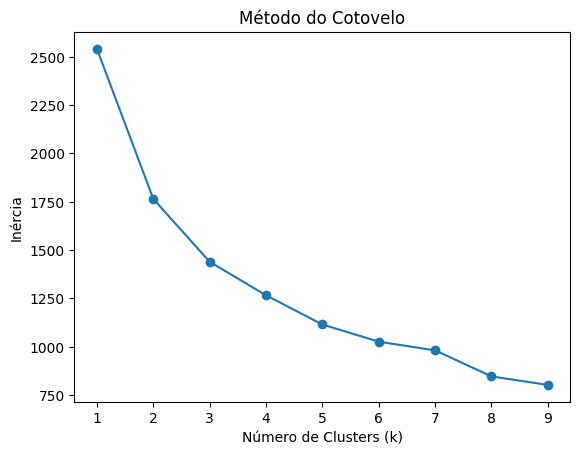

In [18]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [19]:
# Estatísticas médias por cluster
cluster_stats = meia_ofensivo.groupby('Cluster')[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]].mean()
cluster_stats['Jogadores'] = meia_ofensivo['Cluster'].value_counts()
print(cluster_stats)

               xG       xAG      G-PK  Assistencias       PrgC        PrgP  \
Cluster                                                                      
0        3.553125  2.753125   3.84375          2.75    65.9375        71.5   
1        1.648421  0.869474  1.326316      0.663158  16.410526   37.747368   
2        6.707895  2.134211  6.447368      2.473684  30.473684   44.105263   
3        5.408333  5.941667       5.5      5.083333  59.833333  140.166667   
4            1.65  1.669565       1.5      2.195652  24.369565   92.282609   
5          1.7125    3.3375     1.875         4.125     48.125     215.875   

          Key_Pass  Passing 1/3      Cross  Dribles_Tentados  Dribles_certos  \
Cluster                                                                        
0           30.125     48.09375    60.9375          84.15625         41.5625   
1        10.515789    30.968421  15.715789         23.031579       10.389474   
2        21.868421    26.578947  19.184211         38.4

In [20]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = filtered_data.select_dtypes(include=np.number).columns
correlation_matrix = filtered_data[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                       age  Playing Time_Min  Progression_PrgR  Expected_xG  \
age               1.000000          0.141602         -0.032378     0.071343   
Playing Time_Min  0.141602          1.000000          0.478521     0.429917   
Progression_PrgR -0.032378          0.478521          1.000000     0.642432   
Expected_xG       0.071343          0.429917          0.642432     1.000000   
Expected_xAG      0.098302          0.484829          0.629914     0.456093   
Performance_G-PK  0.068123          0.453063          0.654631     0.837174   
Performance_Ast   0.131189          0.451073          0.511166     0.400853   
Progression_PrgC -0.108290          0.449758          0.803381     0.346493   
Progression_PrgP  0.145705          0.673506          0.174723    -0.036769   
Performance_Crs   0.081818          0.303275          0.520265     0.195177   
Take-Ons_Att     -0.208309          0.353077          0.747486     0.335142   
Take-Ons_Succ    -0.224510          0.344573        

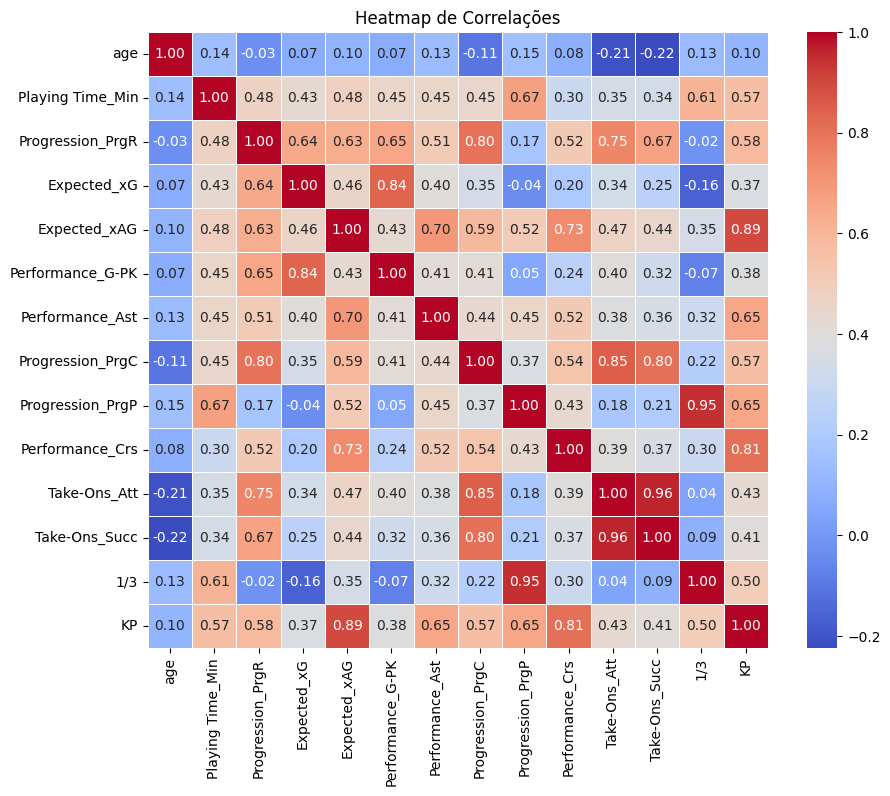

In [21]:
plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

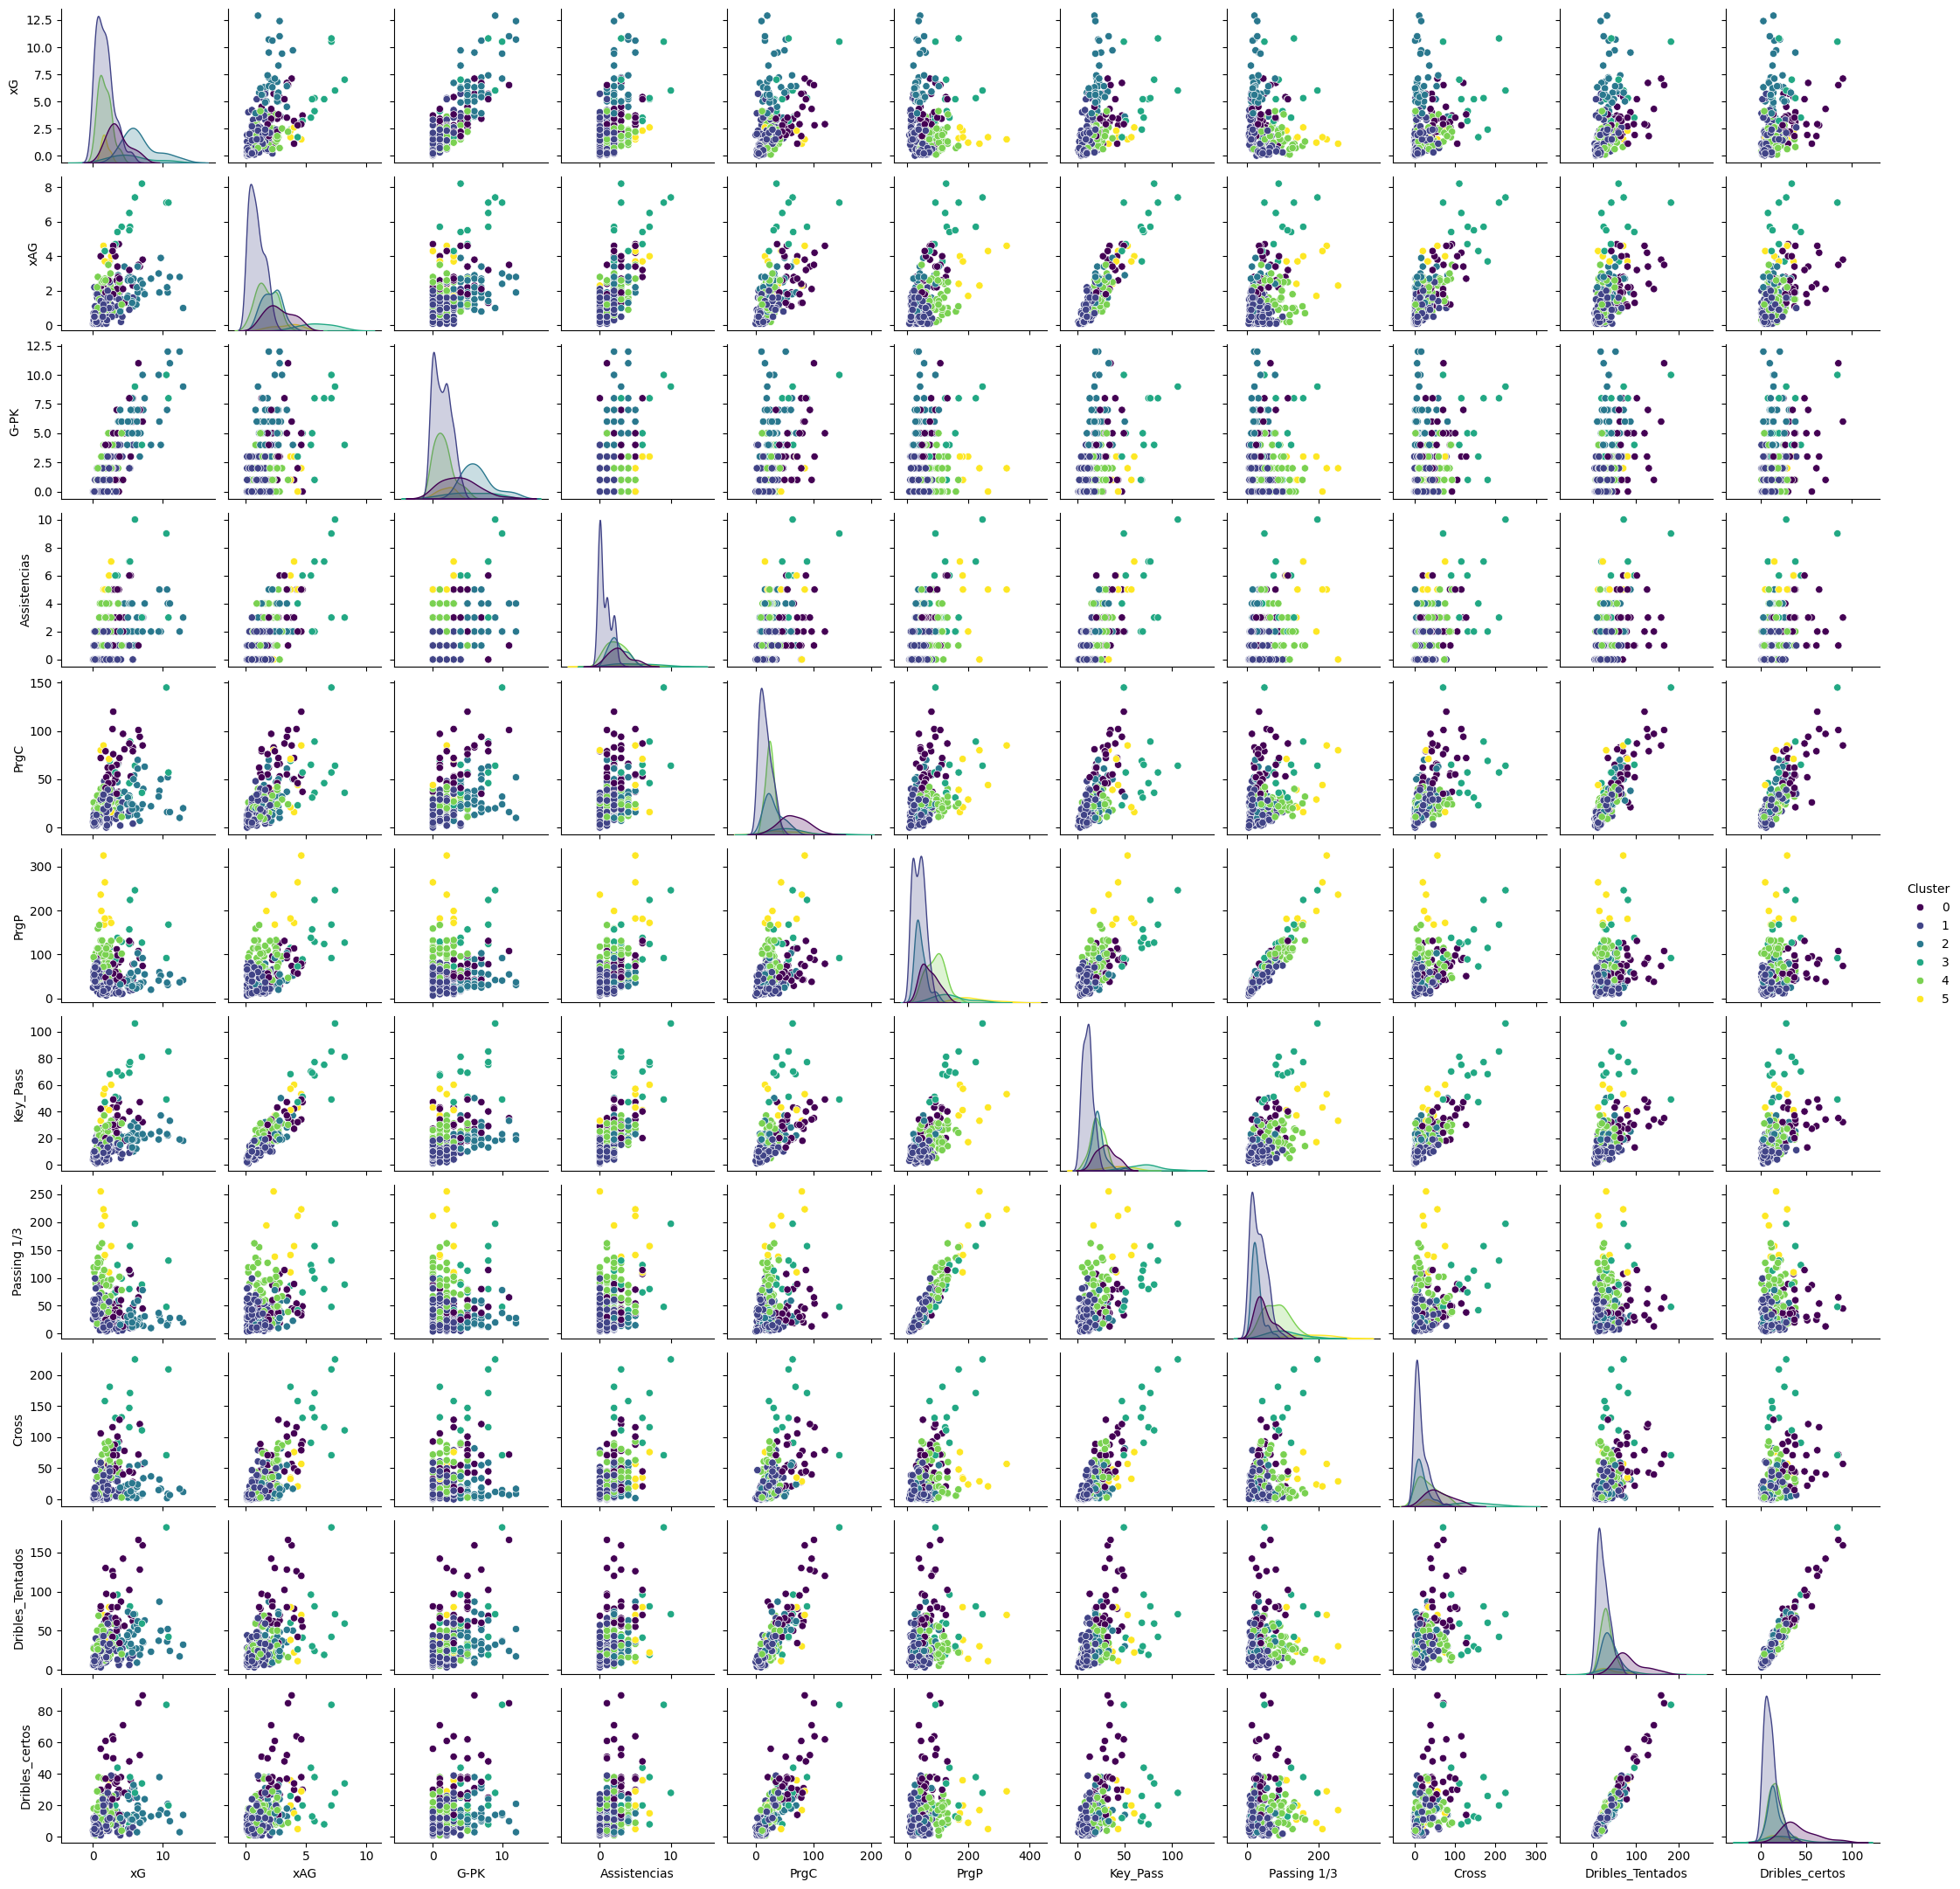

In [22]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(meia_ofensivo[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()

### **Comportamento de Variáveis e Distribuição de Clusters para Meias Ofensivos**

---

### **1. Análise de Correlações**

#### **Correlação Positiva Alta**
1. **xG vs xAG (0.84):**
   Meias ofensivos que têm alta expectativa de gols (xG) frequentemente possuem alta expectativa de assistências (xAG), indicando que jogadores produtivos ofensivamente equilibram bem finalização e criação.

2. **PrgC (Progresso por Condução) vs PrgP (Progresso por Passe) (0.80):**
   Jogadores que avançam com a bola dominada também contribuem significativamente com passes progressivos, mostrando versatilidade ofensiva.

3. **Assistências vs Key Passes (0.70):**
   Meias que realizam mais passes-chave frequentemente acumulam mais assistências, destacando seu papel na criação de jogadas decisivas.

4. **Take-Ons Tentados vs Take-Ons Certos (0.85):**
   Alta correlação entre dribles tentados e bem-sucedidos reflete a confiança e habilidade técnica desses jogadores em situações individuais.

5. **xAG vs Cruzamentos (0.73):**
   Jogadores que realizam cruzamentos frequentemente têm maior expectativa de assistências, mostrando especialização em bolas alçadas.

---

#### **Correlação Moderada Positiva**
1. **PrgP vs Assistências (0.67):**
   Meias com maior número de passes progressivos frequentemente contribuem com assistências, indicando que seu impacto ofensivo é distribuído por meio de passes.

2. **Passing 1/3 (Passes no Último Terço) vs Assistências (0.65):**
   Alta participação no último terço está ligada a maior probabilidade de assistências, mostrando sua influência em áreas decisivas.

3. **xG vs Assistências (0.65):**
   Meias que finalizam bem também contribuem com assistências, sugerindo um equilíbrio entre criação e finalização.

4. **Key Passes vs Passing 1/3 (0.81):**
   Passes no último terço do campo estão fortemente ligados à criação de chances, reforçando a importância da visão de jogo.

---

#### **Correlação Negativa Moderada**
1. **Idade vs Take-Ons Tentados (-0.22):**
   Meias mais jovens tendem a arriscar mais em dribles, o que pode refletir maior confiança e energia.

2. **Idade vs Key Passes (-0.10):**
   Jogadores mais jovens registram menos passes-chave, o que pode ser uma questão de experiência em tomada de decisão.

---

### **2. Perfis dos Clusters**

#### **Cluster 0 (Construtores Diretos)**
- **Perfil:** Alta média de passes progressivos (71.5), condução de bola (65.9), e cruzamentos (60.9), mas contribuição moderada em xG (3.55) e assistências (2.75).
- **Estilo de Jogo:** Focados na progressão direta, utilizando passes e cruzamentos para avançar as jogadas.
- **Função Principal:** Apoiar a transição ofensiva e fornecer suporte para os atacantes.

---

#### **Cluster 1 (Meias de Apoio)**
- **Perfil:** Menores valores em assistências (0.66), cruzamentos (15.7), e dribles certos (10.38), com foco em passes simples.
- **Estilo de Jogo:** Atuam como suporte secundário, concentrando-se em passes seguros e controle de bola no meio-campo.
- **Função Principal:** Garantir a estabilidade e o domínio de posse no meio de campo.

---

#### **Cluster 2 (Especialistas em Assistências)**
- **Perfil:** Alta média de assistências (2.47), passes no último terço (178.6), e cruzamentos (19.1).
- **Estilo de Jogo:** Focados em criar chances para os atacantes, especialmente em situações de bolas paradas ou passes curtos.
- **Função Principal:** Ser a principal fonte de criação ofensiva.

---

#### **Cluster 3 (Meias Ofensivos Completos)**
- **Perfil:** Valores elevados em xG (5.40), xAG (5.94), assistências (5.08), e key passes (70.4).
- **Estilo de Jogo:** Versáteis e eficazes em todas as áreas ofensivas, combinando criação e finalização.
- **Função Principal:** Liderar o ataque com jogadas decisivas e gols.

---

#### **Cluster 4 (Finalizadores Criativos)**
- **Perfil:** Moderada contribuição em assistências (4.12), xAG (3.33), e forte desempenho em passes progressivos (215.8).
- **Estilo de Jogo:** Jogadores equilibrados que combinam criação e finalização em áreas críticas.
- **Função Principal:** Fornecer tanto criatividade quanto presença ofensiva.

---

#### **Cluster 5 (Especialistas em Dribles e Cruzamentos)**
- **Perfil:** Alta média de dribles tentados (36) e cruzamentos (40.3), mas contribuição moderada em assistências (4.12) e xAG (3.33).
- **Estilo de Jogo:** Jogadores focados em ações individuais e jogadas pelas laterais.
- **Função Principal:** Romper defesas com dribles e gerar oportunidades por meio de cruzamentos.

---

### **3. Destaques em Comportamento**

1. **Progressão por Passe vs Assistências (0.67):**
   Meias que avançam o jogo com passes progressivos frequentemente registram mais assistências, reforçando sua importância na construção ofensiva.

2. **Cruzamentos vs Assistências (0.73):**
   A relação entre cruzamentos e assistências mostra que jogadores focados em bolas alçadas contribuem significativamente para o ataque.

3. **Dribles Tentados vs Dribles Certos (0.85):**
   Alta confiança e habilidade técnica em situações individuais são características dos especialistas em dribles.

4. **Key Passes vs Passing 1/3 (0.81):**
   Passes-chave no último terço reforçam a importância da precisão e visão de jogo na criação de chances.

---

In [23]:
cluster_names = {
    0: 'construtores diretos',
    1: 'mei apoio',
    2: 'mei assist',
    3: 'mei completos',
    4: 'finalizadores criativos',
    5: 'dribladores_cross',
}

# Adicionar nomes ao DataFrame
meia_ofensivo['Perfil'] = meia_ofensivo['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Perfil']].head())

     xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  \
0   3.5  2.5     4             1    47    57        23           30     36   
4   3.7  4.7     0             5    37    82        47           49     93   
5   1.8  1.8     1             0    15    58        14           37     28   
8   1.6  2.4     1             3    39   168        37          138     48   
10  0.6  0.2     0             0     7    16         5           14      8   

    Dribles_Tentados  Dribles_certos                Perfil  
0                 44              16            mei assist  
4                 55              30  construtores diretos  
5                 24               9             mei apoio  
8                 23              11     dribladores_cross  
10                22              13             mei apoio  


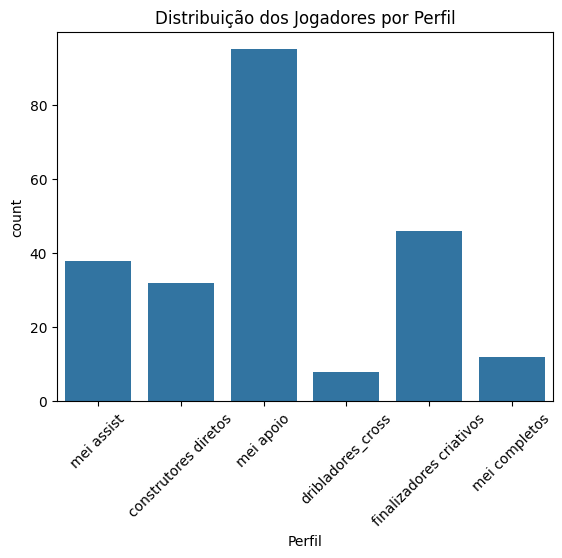

In [24]:
sns.countplot(data=meia_ofensivo, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()

In [25]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos','xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "mei completos"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)


Jogadores no perfil: mei completos
                  jogador            time posicao  Minutos    xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  Dribles_certos
32             Alejo Cruz  Atl Goianiense   FW,MF     2156   2.4  3.7     1             2    69   115        68           86    181                60              26
67                Shaylon  Atl Goianiense   FW,MF     2167   4.1  5.7     1             2    36   129        67           99    132                24              10
112  Cauly Oliveira Souza           Bahia   MF,FW     2676   3.5  5.4     4             6    65   138        70          123     91                96              44
155    Jefferson Savarino   Botafogo (RJ)   MF,FW     2009   5.2  6.5     8             7    46   124        75           80    116                19               8
212         Rodrigo Garro     Corinthians   MF,FW     2995   6.0  7.4     9            10    64   246       106          197    225   

In [26]:
# Dicionário dos peso para cada métrica
pesos = {
    'xG': 1.1,
    'xAG': 1.85,
    'G-PK': 1.80,
    'Assistencias': 2,
    'Acoes Ofensivas': 1.2,
    'Key_Pass': 1.5,
    'Passing 1/3': 1.1,
    'Cross': 1.0,
    '%Dribles': 1.25
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    # Verifica se a coluna é numérica antes de normalizar
    if pd.api.types.is_numeric_dtype(coluna):
        return coluna / coluna.max()
    else:
        # Se a coluna não for numérica, converte para numérica
        # (ignorando erros para valores não numéricos)
        return pd.to_numeric(coluna, errors='coerce') / pd.to_numeric(coluna, errors='coerce').max()

# Normalizando 'Acoes Ofensivas' e 'Dribles'
meia_ofensivo['Acoes Ofensivas'] = normalizar(meia_ofensivo['Acoes Ofensivas']) * 100
meia_ofensivo['%Dribles'] = normalizar(meia_ofensivo['%Dribles']) * 100

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    meia_ofensivo[coluna + '_Pontuacao'] = meia_ofensivo[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
meia_ofensivo['Pontuacao_Total'] = meia_ofensivo[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = meia_ofensivo['Pontuacao_Total'].min()
max_pontuacao = meia_ofensivo['Pontuacao_Total'].max()
meia_ofensivo['Pontuacao'] = (
    (meia_ofensivo['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'mei completos'
jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: mei completos
 Ranking           time posicao              jogador        Perfil  Pontuacao
       1    Corinthians   MF,FW        Rodrigo Garro mei completos      100.0
       2       Cruzeiro   FW,MF      Matheus Pereira mei completos  79.208765
       3      Palmeiras      MF        Raphael Veiga mei completos  78.701585
       4         Grêmio   MF,FW     Franco Cristaldo mei completos   60.52912
       5 Atl Goianiense   FW,MF           Alejo Cruz mei completos  58.893967
       6          Bahia   MF,FW Cauly Oliveira Souza mei completos  55.757064
       7  Internacional   MF,FW         Alan Patrick mei completos  54.299804
       8  Botafogo (RJ)   MF,FW   Jefferson Savarino mei completos  54.207512
       9 Atl Goianiense   FW,MF              Shaylon mei completos  53.954555
      10      Fortaleza   MF,FW     Tomas Pochettino mei completos  47.717199
      11      Palmeiras      FW      Estêvão Willian mei completos  42.599694
      12      Juv

In [27]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'mei completos'  # Defina o perfil desejado
jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))

Jogadores disponíveis no perfil 'mei completos': ['Alejo Cruz', 'Shaylon', 'Cauly Oliveira Souza', 'Jefferson Savarino', 'Rodrigo Garro', 'Matheus Pereira', 'Tomas Pochettino', 'Franco Cristaldo', 'Alan Patrick', 'Nenê', 'Estêvão Willian', 'Raphael Veiga']
Digite o nome do jogador (ou 'sair' para finalizar): Rodrigo Garro
Insira o valor de mercado para Rodrigo Garro (€M): 8
Digite o nome do jogador (ou 'sair' para finalizar): Matheus Pereira
Insira o valor de mercado para Matheus Pereira (€M): 5
Digite o nome do jogador (ou 'sair' para finalizar): Tomas Pochettino
Insira o valor de mercado para Tomas Pochettino (€M): 2
Digite o nome do jogador (ou 'sair' para finalizar): Alan Patrick4
Jogador não encontrado. Tente novamente.
Digite o nome do jogador (ou 'sair' para finalizar): Nenê
Insira o valor de mercado para Nenê (€M): 1
Digite o nome do jogador (ou 'sair' para finalizar): Alan Patrick
Insira o valor de mercado para Alan Patrick (€M): 4
Digite o nome do jogador (ou 'sair' para fina


Jogadores selecionados: Rodrigo Garro, Alan Patrick, Wellington Rato
      xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Key_Pass  Passing 1/3  Cross  Dribles_certos  Minutos
212  6.0  7.4     9            10        75.609756       106          197    225              28     2995
481  7.0  8.2     4             3        39.756098        81           88    111              34     1777
659  2.2  3.5     1             5        17.317073        30           39     93               9     1052


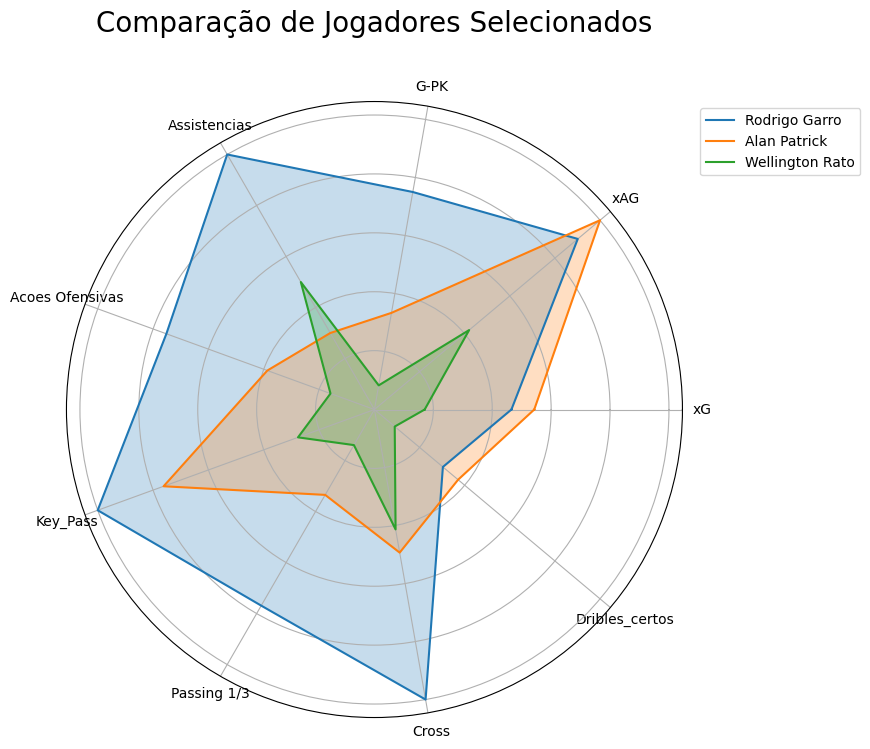

In [28]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Key_Pass','Passing 1/3','Cross','Dribles_certos','Minutos']])

    # Definir as métricas a serem exibidas no radar
    metricas = ['xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Key_Pass','Passing 1/3','Cross','Dribles_certos']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Wellington Rato', 'Rodrigo Garro','Alan Patrick']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, meia_ofensivo)